## Core concepts

- **Regression:** Regression predicts a continuous number. It gives real values as outcome. Prediction.
- **Classification:** Classification predicts a categorical label. It gives a label as outcome. Yes no values.
- **Target Variable Analysis:** Here we examine the features of a target variable which is dependent in nature. It is necessary because once we have examined what our target variable is like then we can set the other data accordingly to get good results in analysis. It also involved transformation. This step profiles the target variable to align preprocessing, transformation, and modeling strategies for better results
- **Advanced data preprocessing:** It is like data processing, here we apply even more advanced strategies to pre process data.
- **Feature Engineering:** Here we create new features using the pre-existing ones to get better information or underlying information that our data holds.
- **Categorical Encoding:** When we have categorical values in our columns and we change it to numrical ones then it is known as categorical encoding. Binary classification
- **Model Building:** It is the process of training and validating an algorithm with the use dependent and independent variables.
- **Model Evaluation:** Once our model is training then we test our model to evaluate the accuracy of our model, that is known as model evaluation.

## Importing libraries

- **pandas:** used to perform operations on structured data with tables
- **numpy:** used to perform mathematical operations on arrays, matrices
- **matplotlib.pyplot:** used to plotting rows and columns in different kinds of charts (basic)
- **seaborn:** holds a collection of graphs and charts which can plot and visualize data in a better way (advanced) (built on matplotlib)
- **scipy.stats:** provides statistical functions, here **skew** measures asymmetry in data distribution
- **sklearn.model_selection:** **(train_test_split)** splits dataset into training and testing sets for model validation
- **sklearn.preprocessing:** **(StandardScaler, LabelEncoder)** StandardScaler normalizes numeric features to a normal scale, LabelEncoder converts categorical labels to numbers.
- A **Z-score** (or standard score) measures how many standard deviations a data point is away from the mean of a dataset, using the formula: ***z = (data point - mean) / standard deviation***
- **sklearn.linear_model:** **LinearRegression** for linear regresion, linear regression is a machine learning algorithm based on the equation y = mx + c
**sklearn.metrics:** **(mean_squared_error, r2_score, mean_absolute_error)** these are metrics to evaluate a regression model's accuracy and error
**xgboost:** It's an efficient library for powerful machine learning models, often used for structured(tables) data prediction
**os:** provides operating system interaction capabilities.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
import os

In [2]:
# setting plot style
sns.set_style('whitegrid')

## Data loading via kaggle

In [3]:
!pip install -q kaggle

- the google.colab import files is used for performing file operations in colab environment
- With the use of os library we used it's function files.upload() to load a file from our storage.

In [4]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

print("\nSucessful")

Saving kaggle.json to kaggle.json

Sucessful


- mkdir stands for make directory *-p* stands for parents. This creates a hidden directory in user's home directory. The role of -p here is that it allows you to create a full directory path, including paths that don't exist (it makes them if mentioned) so this avoids any kind of error.

- **cp** stands for *copy files/directories* from one location to another. Here we are copying kaggle.json file. It was uploaded above and now we are storing it in our hidden directory that we made using mkdir. **~** represents home directory of current user.

- **chmod** stands for change mode and it is used to change the file permissions.
- 600 is an octal representation of permission settings.
- 6 (first digit) provies read(4) + write(2) = 6 permissions for the owner of the file
- 0 (second digit) no permissions for the group
- 0 (third digit) no permissions for others

This is important because kaggle.json contains important information. So it prevents unauthorized users of processes.

---

Here, you need to ensure that you have joined the competition first.

In [5]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 399MB/s]


- **-o** stands for overwrite, it overwrites any existing files. If overwrite didn't exist and the file already existed then it would have asked for permission to replace it

In [6]:
!unzip -o house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


Machine learning has two types:

1) Supervized: training data and testing data, it will guide the model to learn what is right and wrong, we know what kind of result we want. There are dependent and independent values and the value of dependent value is predicted with the help of independent value.
- Independent values are known as features
- Dependent values are known as labeled data

2) Unsupervized: We don't know our target variable

---

#### Process:
1) Our target variable is sales price
2) We will find the features which will effect the sales price the most, like which has the most influence on it.
3) Data cleaning
4) Data preprocessing
5) Feature Engineering

## Set up for files

In [7]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [8]:
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Here we have Id which is counting the number of rows so we don't need an extra index.

In [9]:
train_df.set_index('Id', inplace=True)
test_df.set_index('Id', inplace=True)

In [10]:
train_df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [11]:
print(train_df.shape)
print(test_df.shape)
extra_columns = set(train_df.columns) - set(test_df.columns)
print(extra_columns)

(1460, 80)
(1459, 79)
{'SalePrice'}


In [12]:
test_df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


## EDA on the Target Variable (Sales Price)

In [13]:
train_df["SalePrice"]

,SalePrice
Id,
1,208500
2,181500
3,223500
4,140000
5,250000
...,...
1456,175000
1457,210000
1458,266500


In [14]:
train_df['SalePrice'].info()

<class 'pandas.core.series.Series'>
Index: 1460 entries, 1 to 1460
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 22.8 KB


In [15]:
train_df['SalePrice'].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


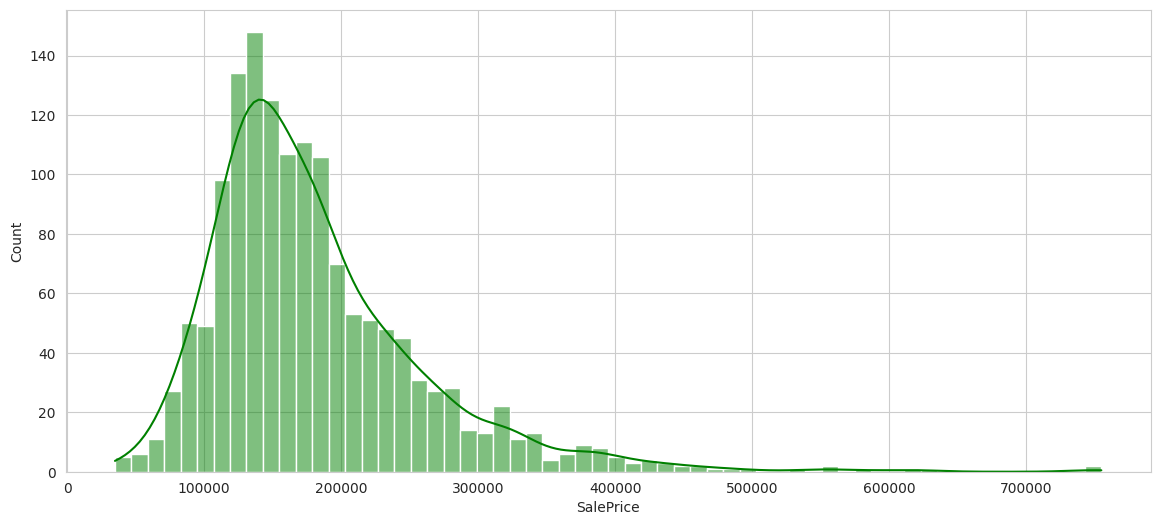

Skewness of SalePrice: 1.8828757597682129


In [16]:
plt.figure(figsize=(14,6))

sns.histplot(train_df['SalePrice'], kde=True, bins= 60, color="green")
plt.show()
print(f"Skewness of SalePrice: {train_df['SalePrice'].skew()}")

- There are outliers
- Most sale price are around 140000
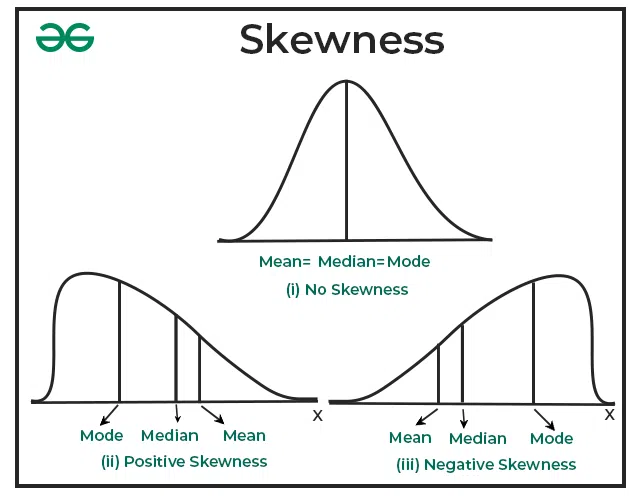
- As we can see, the histogram is positively skewed (right skewed). We have to covert it to almost *no skewness* because it makes it easier to train the model that way.
- A linear model assumes that variables are normally distributed.(Gaussian distribution). Mean = Median = Mode

---

To fix this issue we are going to appy log transformation. How is log transformation going to help here?
Log transformation compresses values, to make them small. It compresses larger values much more than the small ones.
- For example:
- Difference between 10 and 1000 seems huge.
- Difference between log(10) = 2.3 and log(1000)= 6.9 is way too small. This reduction in jump is what helps us to make a more symmetric histogram.
- np.log1p is a NumPy function that calculates the natural logarithm of (1 + x) for each element in the input. np.log1p(x) is implemented to maintain high accuracy, especially when x is near zero.

| Expression                   | Meaning                                                 | Use Case                                      |
|------------------------------|--------------------------------------------------------|-----------------------------------------------|
| (ln(x)\) or `log_e(x)`     | Natural logarithm, base \(e\) (≈2.718)                 | Standard definition in mathematics            |
| (ln(1 + x)\) or `log1p(x)` | Natural log of 1 plus input, i.e., \(\ln(1 + x)\)      | For input data including zeros; numerical stability |


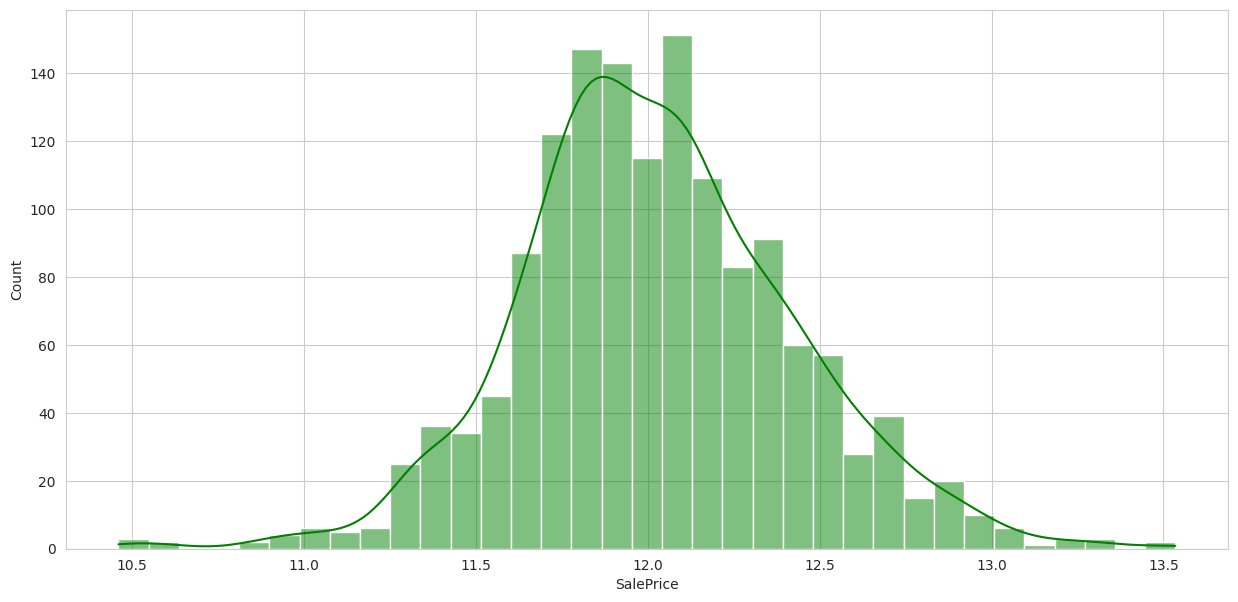

Skewness of SalePrice: 0.12134661989685333


In [17]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

plt.figure(figsize=(15,7))

sns.histplot(train_df['SalePrice'], kde = True, color = 'green')
plt.show()
print(f"Skewness of SalePrice: {train_df['SalePrice'].skew()}")

The skewness has gone low and the plot is close to a normal distribution. Skewness is close to zero.

## EDA on Feature Engineering

We are going to use a heatmap to find positive correlation.
What is that?
- If two values are increasing or decreasing together then it's positive correlation.
- If one value is going up and the other is going down then it is negative correlation.
We are going to find columns which are influencing the SalePrice the most. (Numeric values only)

---

- **annot = True** means that the cells will show the datavalues, if it was false then the heatmap would have only included colors
- **fmt** stands for format, it specifies string format for annotations (since annot = True)
- **fmt = ".2f"** means that the values will be upto 2 decimal points
- **fmt = 'd'** is used for integer data.
- **vmin** and **vmax** sets the lowest and highest value to start and end color in the colourmap to control appearance and ensure uniformity.

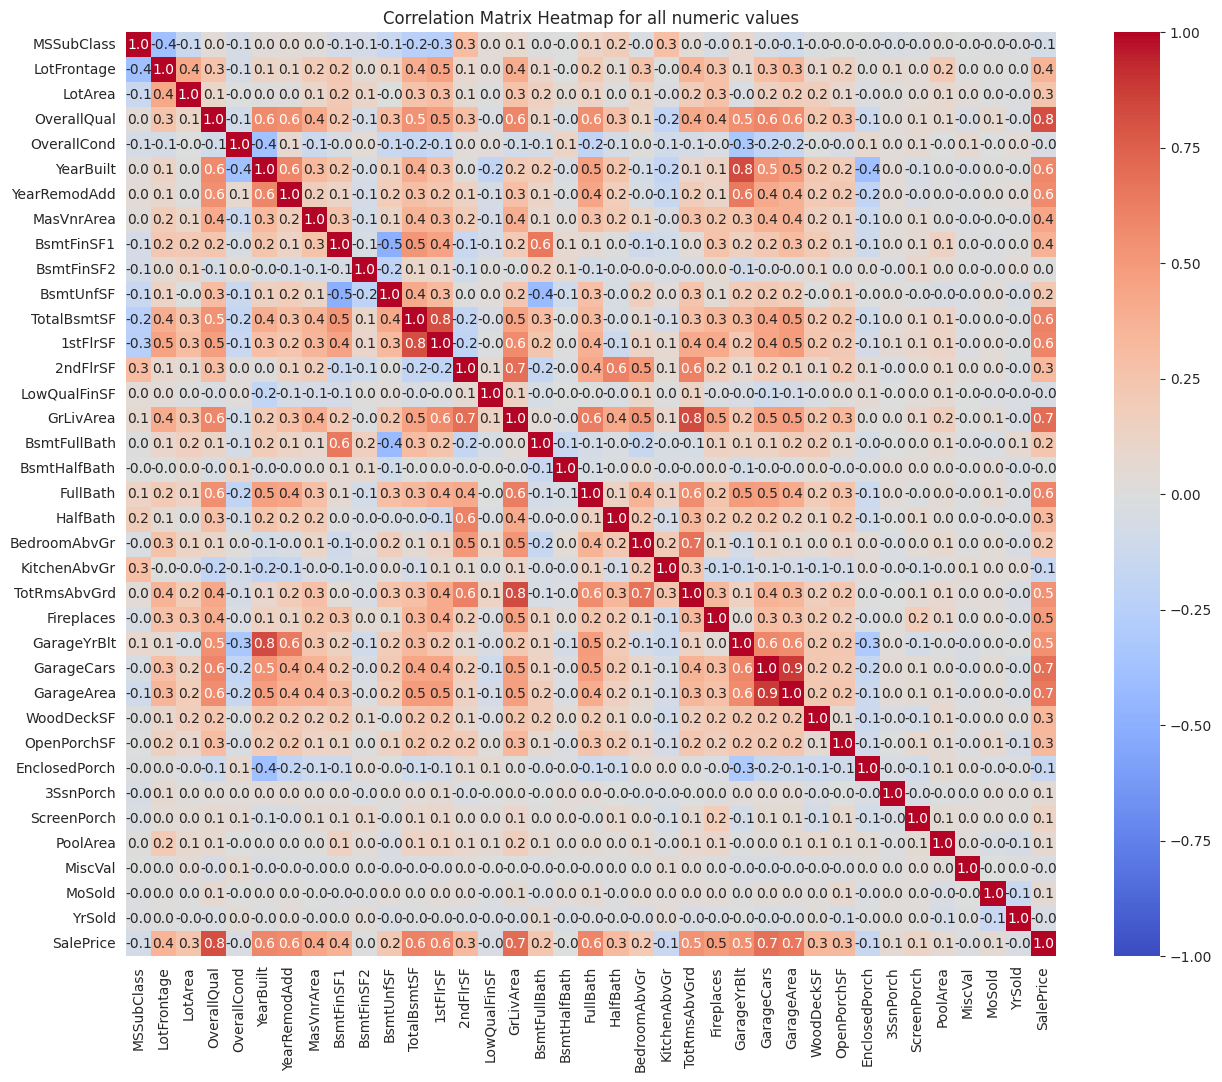

In [18]:
corrmat = train_df.corr(numeric_only=True)
plt.figure(figsize=(15, 12))
sns.heatmap(corrmat, annot=True, fmt=".1f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap for all numeric values')
plt.show()

- This is how all the numeric values are correlated with SalePrice.
- I can see that OverallQual, GrLivArea, GarageCars, GarageArea, YearBuilt etc are positively correlated with SalePrice.

---

#### top_corr_features = corrmat.nlargest(10,'SalePrice').index
- Stores index lables of the top ten features correlated with SalePrice
- **corrmat.nlargest(10, 'SalePrice'):** This code is selecting 10 largest values from the column SalePrice in the dataframe corrmat.
- **corrmat.nlargest(10,'SalePrice')['SalePrice']** Selects only SalePrice column
- **.index** extracts index labels for the top 10 features.

#### top_corr_matrix = train_df[top_corr_features].corr()

- **train_df[top_corr_features]:** this part of code train_df is calling columns present in top_corr_features.
- **.corr()** this creats a correlation matrix between the columns selected by train_df[top_corr_features].

In [19]:
# Let's create a heatmap for the top 10 values.
top_corr_features = corrmat.nlargest(10,'SalePrice').index
print(top_corr_features)
top_corr_matrix = train_df[top_corr_features].corr()
top_corr_matrix

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')


,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd
SalePrice,1.000000,0.817185,0.700927,0.680625,0.650888,0.612134,0.596981,0.594771,0.586570,0.565608
OverallQual,0.817185,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.572323,0.550684
GrLivArea,0.700927,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.199010,0.287389
GarageCars,0.680625,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.537850,0.420622
GarageArea,0.650888,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.478954,0.371600
TotalBsmtSF,0.612134,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.391452,0.291066
1stFlrSF,0.596981,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.281986,0.240379
FullBath,0.594771,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.468271,0.439046
YearBuilt,0.586570,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,1.000000,0.592855
YearRemodAdd,0.565608,0.550684,0.287389,0.420622,0.371600,0.291066,0.240379,0.439046,0.592855,1.000000


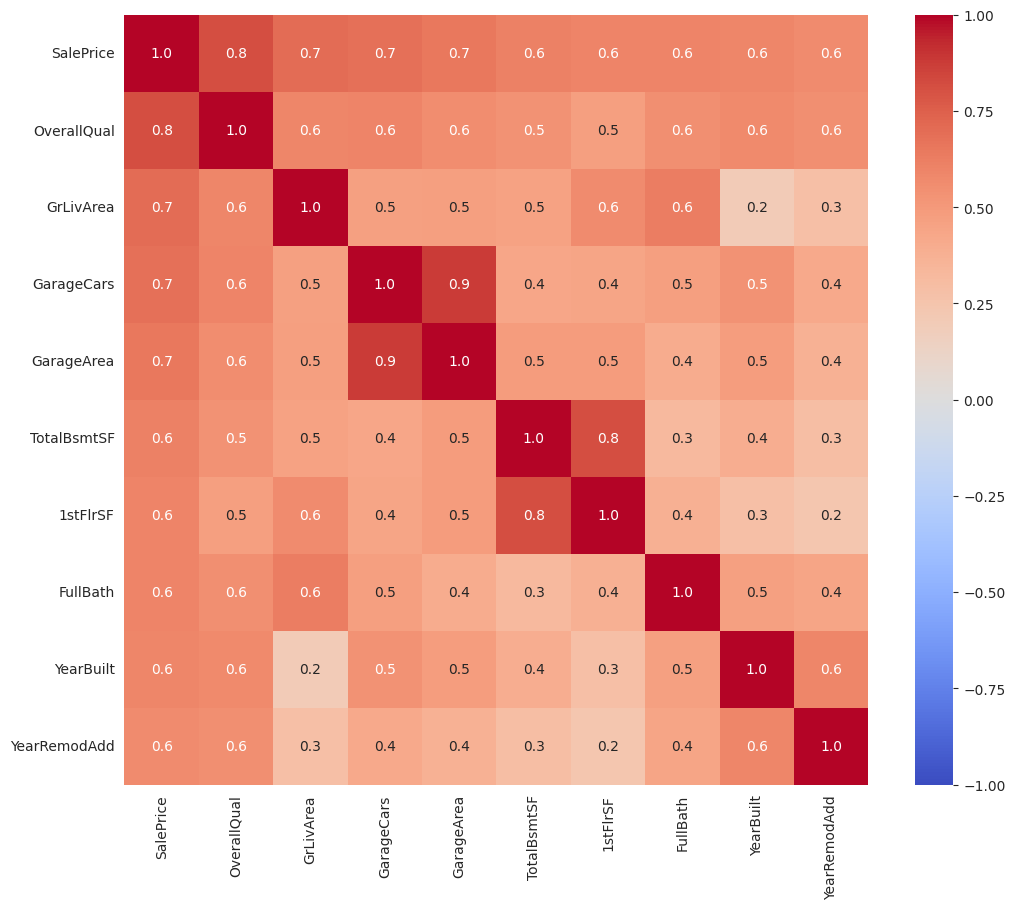

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(top_corr_matrix,annot=True, fmt='.1f', cmap='coolwarm', vmin = -1, vmax=1)
plt.show()

- So now I can see that the values posivtively correlated with SalePrice are OverallQual, GriLiveArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, YearBuilt, YearRemodAdd.
- OverallQual is the most correlated with SalePrice and ('TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd') are least correlated.
- From the most correlated, we can say that, Overall quality, Living area above around and size of garage influences the SalePrice the most.

## Data Preprocessing and Feature Engineering

We have finished analyzing the target variable.
- We transformed it's histplot to a normal distributed plot since linear agression assumes that the plot is normally distributed.
- We learned about the numeric values which influence the SalePrice most.
- Now it's time for handeling missing values and creating new features to prepare the data for modeling.

---

- **.loc** is used to select rows and columns by labels rather than their integer index. **Syntax** -> *df.loc[row_label, column_label]*
- **.iloc** is for indexes
- .loc[] selects columns including 'SaleCondition'
- **train_df.loc[:,:'SaleCondition']**: We are selecting rows and columns upto SaleCondition from train and test data frames.
- SalePrice is the last column in our dataframe and we are excluding it in the variable "all_data".
* We are combining data of train and test together to preprocess all of them together, to ensure consistent transformation in both dataframes.This prevents data leakage and potential issues later.
- first all rows and columns of train_df will be selected and then test_df dataframe.



In [21]:
all_data = pd.concat((train_df.loc[:,:'SaleCondition'], test_df.loc[:,:'SaleCondition']))
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [22]:
print(all_data.shape) #Combined data
print(train_df.shape)
print(test_df.shape)

(2919, 79)
(1460, 80)
(1459, 79)


### Handeling missing data

In [23]:
missing_data = all_data.isna().sum().sort_values(ascending = False)
print(missing_data)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
MasVnrType       1766
                 ... 
EnclosedPorch       0
MiscVal             0
MoSold              0
YrSold              0
SaleCondition       0
Length: 79, dtype: int64


There are a lot of columns with no missing values, so let's look for columns which have missing values greater than zero

In [24]:
missing_data = missing_data[missing_data> 0]
print(missing_data)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageFinish     159
GarageYrBlt      159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Functional         2
BsmtFullBath       2
Utilities          2
Exterior1st        1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF1         1
SaleType           1
KitchenQual        1
GarageCars         1
GarageArea         1
Electrical         1
Exterior2nd        1
BsmtFinSF2         1
dtype: int64


- **syntax:** DataFrame.select_dtypes(include=None, exclude=None)
- examples for include: number, object, category, np.number, float64, int64
- to select all numberic(integer,float etc.) columns - number or np.number
- to select all catergorical/object columns - ['object', 'category']
- to select all columns except float - exclude = 'float64'
- .columns selects the columns


In [25]:
numeric_cols = all_data.select_dtypes(include=[np.number]).columns
missing_data_numeric = all_data[numeric_cols].isna().sum()
missing_data_numeric = missing_data_numeric[missing_data_numeric > 0].sort_values(ascending=False)
print(missing_data_numeric)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
BsmtFinSF1        1
BsmtFinSF2        1
TotalBsmtSF       1
BsmtUnfSF         1
GarageCars        1
GarageArea        1
dtype: int64


- Columns which have less number of missing values, we are going to fill it with zero

In [26]:
missing_data_numeric_zero = ['MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath','BsmtFinSF1','BsmtFinSF2', 'TotalBsmtSF', 'BsmtUnfSF', 'GarageCars','GarageArea']
for cols in missing_data_numeric_zero:
  if cols in all_data.columns:
    all_data[cols] = all_data[cols].fillna(0)


In [27]:
all_data[['LotFrontage', 'GarageYrBlt']].describe()

,LotFrontage,GarageYrBlt
count,2433.000000,2760.000000
mean,69.305795,1978.113406
std,23.344905,25.574285
min,21.000000,1895.000000
25%,59.000000,1960.000000
50%,68.000000,1979.000000
75%,80.000000,2002.000000
max,313.000000,2207.000000


In [28]:
all_data['LotFrontage'].value_counts()

,count
LotFrontage,
60.0,276
80.0,137
70.0,133
50.0,117
75.0,105
...,...
155.0,1
126.0,1
200.0,1


- LotFrontage: Linear feet of street connected to property
- Neighborhood: Physical locations within Ames city limits
- The assumption here is that the Linear feet of street are linked with Neighborhood because every neighborhood follows specific laws, property layouts and planning regulations.

---

- **all_data.groupby('Neighborhood')** groups all unique values present in the Neighborhood column from all_data dataframe. This does not mean that the changes are literally made in the dataframe.

In [31]:
group = all_data.groupby('Neighborhood')
print(group)

- This output tells us the the groupby function is lazy, here this output is basically representing that the groupby function has created a lazy GroupBy object which knows how to group the rows in the neighborhood column
- The hexadecimal value is the location where this object is stored
- It won't actually group the Neighborhood values until we will provide an aggregation, transformation function or explicitly request grouped data.

---

1) all_data.groupby('Neighborhood') groups all the data under unique values of Neighborhood from all_data dataframe
2) Now 'LotFrontage' values are arranged according to the Neighborhood. It means we are focusing only on the 'LotFrontage' values within each Neighborhood.
3) .agg(['mean', 'median', 'std', 'count']): We are applying multiple aggregation functions to the LotFrontage values in different groups of Neighborhood
4) We are sorting the values according to the median. This helps to quickly identify neighborhoods with smaller or larger median frontage.

In [32]:
group_stats = all_data.groupby('Neighborhood')['LotFrontage'].agg(['mean', 'median', 'std', 'count']).sort_values('median')
print(group_stats)

                   mean  median        std  count
Neighborhood                                     
BrDale        21.500000    21.0   1.137147     30
MeadowV       25.606061    21.0   8.521808     33
NPkVill       28.142857    24.0  10.398489     21
Blueste       27.300000    24.0   5.313505     10
Blmngtn       46.900000    43.0   4.919350     20
BrkSide       55.789474    51.0  12.722818     95
IDOTRR        62.241379    60.0  15.454333     87
OldTown       61.777293    60.0  15.642896    229
SWISU         59.068182    60.0   9.912167     44
StoneBr       62.173913    60.0  21.696189     46
Gilbert       74.207207    64.0  28.386654    111
Edwards       66.910112    65.0  26.372019    178
SawyerW       70.669811    67.0  14.384331    106
CollgCr       71.336364    70.0  15.940401    220
Crawfor       69.951807    70.0  19.141262     83
Sawyer        74.551020    72.0  15.165154     98
Somerst       64.549383    72.5  23.984740    162
NAmes         75.210667    73.0  19.686198    375


We can see the LotFrontage values for each neighborhood.
- Median: For all the Lotfrontage values in a specific neighborhood, it gives us a central idea about those areas. (less affected by outliers)

- std(standard deviation): It tells us about how much variability lies between the values. If std is low then it will mean the values are close. If std is high it means the values are far with a lot of variations.
- count: shows us the number of houses in each neighborhood
- mean: an average, if it's high their might be outliers

**Insight**
1) BrDale has the shortest lot frontage area where as NridgHt has largest lot frontage area
2) The highest number of houses are present in NAmes. It's std is 19 which means the variations of lot frontage values are balanced, not too much and not too less.
3) NoRidge means is 91 and it's median is 89 it means almost all houses in NoRidge have large areas

---

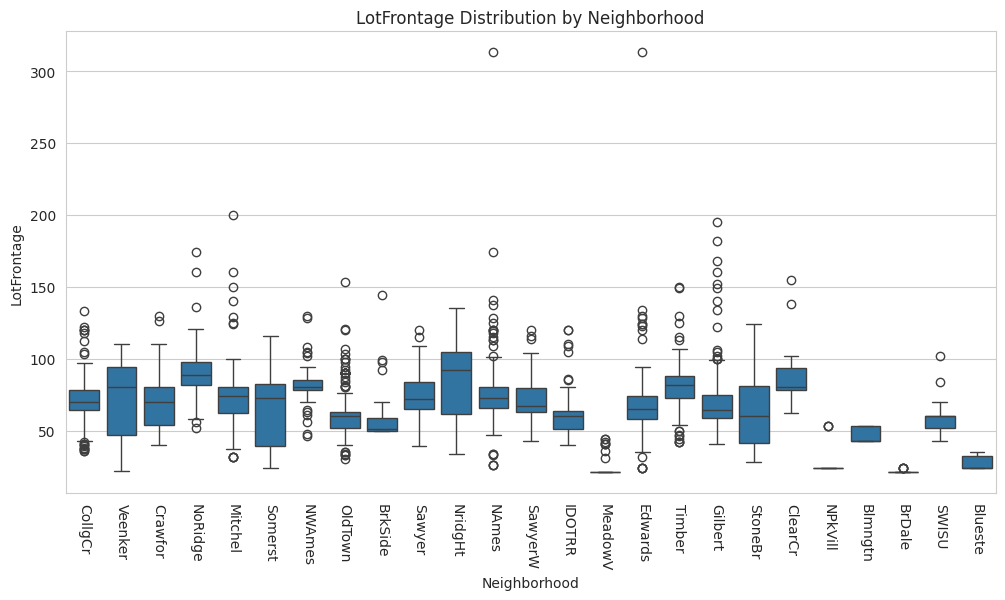

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='LotFrontage', data=all_data)
plt.xticks(rotation=270)
plt.title('LotFrontage Distribution by Neighborhood')
plt.show()

##### How to read a box plot?
- The line in the blue box represents the median. (half homes above and half homes below)
- Blue box represents the middle 50% (from 25th percentile to 75th percentile) and is known as Interquartile range or IQR.
- Whiskers are the lines extending from the box, they show the spread of most of the data (usually upto 1.5 times the IQR above and below the box)
- Circles are *outliers* meaning the values which are much higher or lower than the typical values.

**Insights**
1) Blmngtn, NridgHt, SToneBr, Somerst and Blueste have no outliers. This means that the lotfrontage areas are evenly distributed in these areas.
2) NAmes and Edwards has one very high outlier, it might mean that it is an open field or the person owning that land is very rich to have a area this big.
3) NridgHt has it's median line higher in the box, it means that most of the people have a smaller Lot Frontage.

---

- if LotFrontage is in all_data and if any value in LotFrontage is null
- isnull() returns a series of boolean values where true is for null value and false is for non-null value
- any() checks if there is atleast one value in that series is true
- we are not using isnull() alone because if condition expects one boolean value, not series of them. So any() returns one boolean value.
- here groupby groups all unique values in the Neighborhood and then for each group in Neighborhood, I am calculating LotFrontage values.
- Using the transform function for any value x if it's null then we are filling it with median.
- All this is stored in all_data of 'LotFrontage' value


In [34]:
# Impute LotFrontage with the median of the neighborhood
if 'LotFrontage' in all_data.columns and all_data['LotFrontage'].isnull().any():
    all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [56]:
print(all_data['LotFrontage'])
print(all_data['LotFrontage'].isnull().sum())

Id
1        65.0
2        80.0
3        68.0
4        60.0
5        84.0
        ...  
2915     21.0
2916     21.0
2917    160.0
2918     62.0
2919     74.0
Name: LotFrontage, Length: 2919, dtype: float64
0


In [61]:
all_data[numeric_cols].isna().sum()

,0
MSSubClass,0
LotFrontage,0
LotArea,0
OverallQual,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
MasVnrArea,0
BsmtFinSF1,0
BsmtFinSF2,0


In [59]:
if 'GarageYrBlt' in all_data.columns:
    all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(0)


print("\nMissing values after all imputation:", all_data.isnull().sum().sum())


Missing values after all imputation: 0


- If we explicitly don't set data types then pandas assigns object data type to any column with text or mixed types.
- category is a panda datatype which is set for columns which have a fixed set of values. for example: yes, no or male, female or great,good,bad, worst
- category dtype saves memory and allows for categorical operations
- every categorical data type can be an object datatype but not every object datatype can be categorical datatype.

In [45]:
categorical_cols = all_data.select_dtypes(include=['object', 'category']).columns
missing_data_categorical = all_data[categorical_cols].isna().sum()
missing_data_categorical = missing_data_categorical[missing_data_categorical > 0].sort_values(ascending=False)

In [46]:
all_data['Alley'].value_counts()

,count
Alley,
None,2721
Grvl,120
Pave,78


In [47]:
all_data['Fence'].value_counts()

,count
Fence,
None,2348
MnPrv,329
GdPrv,118
GdWo,112
MnWw,12


In [48]:
print(categorical_cols)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [49]:
categorical_cols_to_impute_none = ['Alley', 'Fence', 'MiscFeature', 'PoolQC', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']
for col in categorical_cols_to_impute_none:
    if col in all_data.columns: # Check if column exists after one-hot encoding
        all_data[col] = all_data[col].fillna('None')

for col in ['Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Utilities', 'Functional', 'MSZoning']:
    if col in all_data.columns: # Check if column exists after one-hot encoding
        all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

In [50]:
print(all_data[categorical_cols].isna().sum())

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64


### Feature Engineering

- **Total square footage** - Total basement area + total first floor area + total second floor area
- **Total Bathroom** - FullBath + 0.5 * HalfBath, why are we multiplying by .5? If a FullBath is 1 then a halfBath is .5
- For example if a house as 2 full and 1 half -> 2 + 0.5 = 2.5
- **Age** - year it was sold on - year it was built on

In [62]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['TotalBath'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) +
                         all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))
all_data['Age'] = all_data['YrSold'] - all_data['YearBuilt']

## Categorical Encoding

It's of two types:
1) For ordinal features: Those features where there a order of things, sad < happy < excellent, we use **Label Encoding**. (sad = 0, happy = 1, excellent = 2)
2) For Nominal features: When there isn't an order, we use **one-hot encoding**, basically either 1 or 0 for the values. For example- There are three colors Red, Blue, Green

| Color_Red | Color_Blue | Color_Green |
| --------- | ---------- | ----------- |
| 1         | 0          | 0           |
| 0         | 1          | 0           |
| 0         | 0          | 1           |


- the row which has 1 represents that it has that color.

In [63]:
all_data['Neighborhood'].value_counts()

,count
Neighborhood,
NAmes,443
CollgCr,267
OldTown,239
Edwards,194
Somerst,182
NridgHt,166
Gilbert,165
Sawyer,151
NWAmes,131


- We are selecting all the object datatype columns (categorical /text data) and storing them in **categorical_cols**
- Then we are applying One-hot encoding to all the columns present in **categorical_cols**
- When we include all categories in One-hot encoded columns, it creates multicollinearity. **Multicollinearity** is a situation when two or more independent variable are highly correlated (one can be predicted from others)
- For example, we got this table after one-hot encoding feature. Sum of each row is equal to 1, which means one columns is completely dependent on others.Like,*Color_Green = 1 - (Color_Red + Color_Blue)*
---
| Color_Red | Color_Blue | Color_Green |
| --------- | ---------- | ----------- |
| 1         | 0          | 0           |
| 0         | 1          | 0           |
| 0         | 0          | 1           |
---

- That is perfect correlation and Linear regression models can give unstable coefficients or their matrix calculations can fail.
- That is why **drop_first = True**, panda drops one dummy column (first alphabetically present column )
- That will result in:-
---
| Color_Blue | Color_Green |
| ---------- | ----------- |
| 0          | 0           |
| 1          | 0           |
| 0          | 1           |
---

- what changed here? Now we know if both values are zero in first row, then it means the third column will have 1, this avoids redundancy.
---
| Concept                   | Affects                     | Example                                                         |
| ------------------------- | --------------------------- | --------------------------------------------------------------- |
| **One-hot encoding**      | The **input features (X)**  | Converting “Neighborhood” into binary columns                   |
| **Binary classification** | The **target variable (y)** | Predicting whether a house was sold above or below median price |
---

| Term                      | Meaning                                                                   |
| ------------------------- | ------------------------------------------------------------------------- |
| **One-hot encoding**      | Turns categorical input features into 0/1 dummy columns                   |
| **Binary classification** | Predicts one of two target outcomes                                       |
| **Why confusion happens** | Because one-hot encoding produces binary-looking columns                  |
| **Reality**               | Encoding is about *representing data*, not *changing the prediction type* |
---
Basically Binary classification is not happening here.



In [64]:
categorical_cols = all_data.select_dtypes(include=['object']).columns
all_data = pd.get_dummies(all_data, columns=categorical_cols, drop_first=True)

print(f"Data shape after encoding: {all_data.shape}")

Data shape after encoding: (2919, 262)


In [65]:
all_data.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,False,False,False,False,True,False,False,False,True,False
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,False,False,False,False,True,False,False,False,False,False
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,False,False,False,False,True,False,False,False,True,False


In [66]:
all_data.value_counts()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  TotalSF  TotalBath  Age  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  Condition2_PosA  Condition2_PosN  Condition2_RRAe  Condition2_RRAn  Condition2_RRNn  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_1.5Unf  HouseStyle_1Story  HouseStyle_2.5Fin  HouseStyle_2.5Unf  HouseStyle_2Story  HouseStyle_SFoyer  HouseStyle_SLvl  RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  RoofStyle_Shed  RoofMatl_CompShg  RoofMatl_Membran  RoofMatl_Metal  RoofMatl_Roll  RoofMatl_Tar&Grv  RoofMatl_WdShake  RoofMatl_WdShngl  Exterior1st_AsphShn  Exterior1st_BrkComm  Exterior1st_BrkFace  Exterior1st_CBlock  Exterior1st_CemntBd  Exterior1st_HdBoard  Exterior1st_ImStucc  Exterior1st_MetalSd  Exterior1st_Plywood  Exterior1st_Stone  Exterior1st_Stucco  Exterior1st_VinylSd  Exterior1st_Wd Sdng  Exterior1st_WdShing  Exterior2nd_AsphShn  Exterior2nd_Brk Cmn  Exterior2nd_BrkFace  Exterior2nd_CBlock  Exterior2nd_CmentBd  Exterior2nd_HdBoard  Exterior2nd_ImStucc  Exterior2nd_MetalSd  Exterior2nd_Other  Exterior2nd_Plywood  Exterior2nd_Stone  Exterior2nd_Stucco  Exterior2nd_VinylSd  Exterior2nd_Wd Sdng  Exterior2nd_Wd Shng  MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone  ExterQual_Fa  ExterQual_Gd  ExterQual_TA  ExterCond_Fa  ExterCond_Gd  ExterCond_Po  ExterCond_TA  Foundation_CBlock  Foundation_PConc  Foundation_Slab  Foundation_Stone  Foundation_Wood  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_None  BsmtQual_TA  BsmtCond_Gd  BsmtCond_None  BsmtCond_Po  BsmtCond_TA  BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  BsmtExposure_None  BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_None  BsmtFinType1_Rec  BsmtFinType1_Unf  BsmtFinType2_BLQ  BsmtFinType2_GLQ  BsmtFinType2_LwQ  BsmtFinType2_None  BsmtFinType2_Rec  BsmtFinType2_Unf  Heating_GasA  Heating_GasW  Heating_Grav  Heating_OthW  Heating_Wall  HeatingQC_Fa  HeatingQC_Gd  HeatingQC_Po  HeatingQC_TA  CentralAir_Y  Electrical_FuseF  Electrical_FuseP  Electrical_Mix  Electrical_SBrkr  KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA  Functional_Maj2  Functional_Min1  Functional_Min2  Functional_Mod  Functional_Sev  Functional_Typ  FireplaceQu_Fa  FireplaceQu_Gd  FireplaceQu_None  FireplaceQu_Po  FireplaceQu_TA  GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  GarageType_CarPort  GarageType_Detchd  GarageType_None  GarageFinish_None  GarageFinish_RFn  GarageFinish_Unf  GarageQual_Fa  GarageQual_Gd  GarageQual_None  GarageQual_Po  GarageQual_TA  GarageCond_Fa  GarageCond_Gd  GarageCond_None  GarageCond_Po  GarageCond_TA  PavedDrive_P  PavedDrive_Y  PoolQC_Fa  PoolQC_Gd  PoolQC_None  Fence_

## Model building and training

In [67]:
X = all_data[:len(train_df)]
y = train_df['SalePrice'] # SalePrice was already log-transformed and is only in train_df
X_test_final = all_data[len(train_df):]

- **test_size=0.2** train data is split into 80% train and 20% validation
- random_state=42 ensures that you get the same split everytime

- Why people often use 42
- There is nothing special about the number 42 mathematically.
- It's just a fun programming tradition that comes from the book “The Hitchhiker's Guide to the Galaxy”, where 42 is “the answer to life, the universe, and everything.”
- So over time, data scientists started using random_state=42 as a common default seed.
- Seed value is the starting point of random number generation, basically informing python to start from this random state.

In [68]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)